In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data files/wholesalecustomersdata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [11]:
from sklearn.cluster import KMeans
#defining the k-means function with initialization of k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

#fitting the k-means algorithm on scaled data
kmeans.fit(scaled_data)

C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2)

In [12]:
kmeans.inertia_

2599.38555935614

In [13]:
import matplotlib.pyplot as plt

C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known

Text(0, 0.5, 'Inertia')

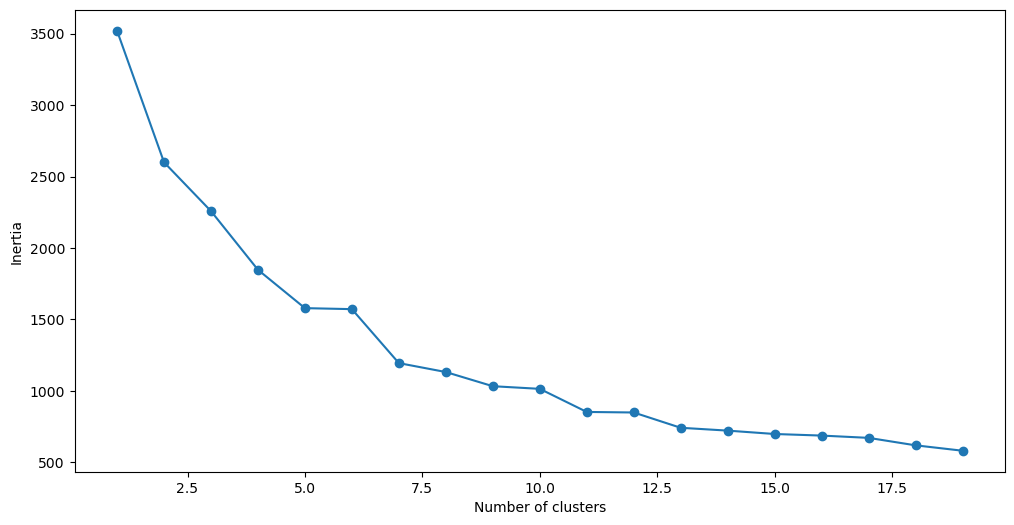

In [25]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster, init="k-means++",n_init='auto')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

#Converting the result into dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [19]:
#k-means using 6 cluster
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
pred

C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       0, 3, 3, 3, 1, 1, 3, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3,
       3, 3, 3, 5, 3, 3, 1, 1, 0, 3, 1, 1, 5, 3, 1, 1, 3, 5, 3, 3, 1, 5,
       1, 3, 1, 1, 0, 0, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 5, 5, 0,
       1, 1, 1, 1, 5, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3,
       1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 3, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       0, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 0, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 5, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 3, 1, 3, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 3, 2, 3, 2, 3, 3, 2, 3,

In [26]:
np.__version__

'1.24.3'

## Example 2

In [28]:
df = pd.read_csv('data files/clustering.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [33]:
df = df.drop('Loan_ID',axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [36]:
df = df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             308 non-null    object 
 1   Married            308 non-null    object 
 2   Dependents         308 non-null    object 
 3   Education          308 non-null    object 
 4   Self_Employed      308 non-null    object 
 5   ApplicantIncome    308 non-null    int64  
 6   CoapplicantIncome  308 non-null    float64
 7   LoanAmount         308 non-null    float64
 8   Loan_Amount_Term   308 non-null    float64
 9   Credit_History     308 non-null    float64
 10  Property_Area      308 non-null    object 
 11  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 31.3+ KB


In [41]:
df.Gender.value_counts()

Male      245
Female     63
Name: Gender, dtype: int64

In [42]:
df.Married.value_counts()

Yes    185
No     123
Name: Married, dtype: int64

In [47]:
df.Dependents.value_counts()

0    194
2     47
1     43
3     24
Name: Dependents, dtype: int64

In [46]:
df.Dependents = df.Dependents.str.replace('+','')

C:\Users\Arifa Mustafa\AppData\Local\Temp\ipykernel_15544\815744712.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Dependents = df.Dependents.str.replace('+','')
C:\Users\Arifa Mustafa\AppData\Local\Temp\ipykernel_15544\815744712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dependents = df.Dependents.str.replace('+','')


In [48]:
encoded = pd.get_dummies(df)

In [49]:
encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
2,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
3,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
4,2333,1516.0,95.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0,0,1,0,1,0,...,1,1,0,1,0,0,0,1,0,1
377,3232,1950.0,108.0,360.0,1.0,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
378,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
379,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1


In [51]:
scaled_data = scaler.fit_transform(encoded)

C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known

Text(0, 0.5, 'Inertia')

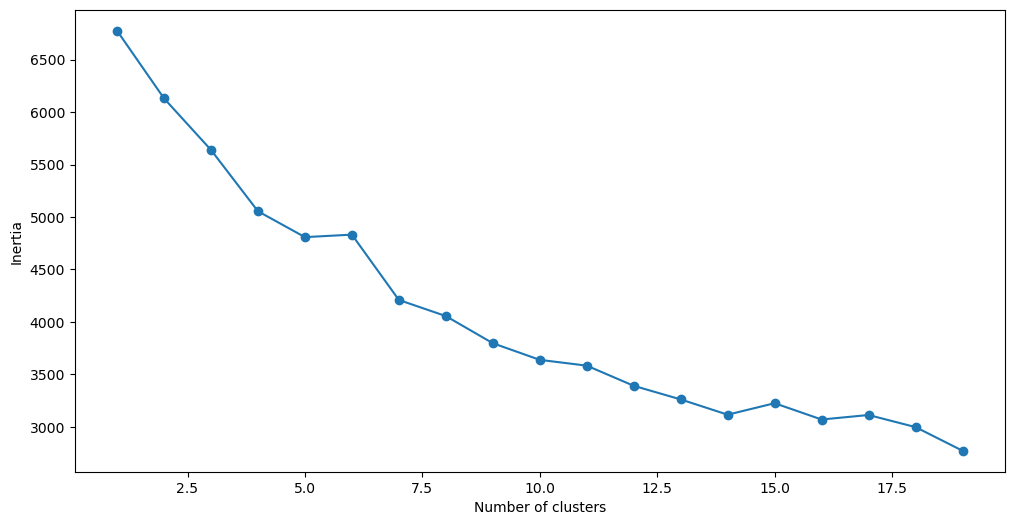

In [52]:
SSE = []
for cluster in range(1,20):
    kmeans2 = KMeans(n_clusters=cluster, init="k-means++",n_init='auto')
    kmeans2.fit(scaled_data)
    SSE.append(kmeans2.inertia_)

#Converting the result into dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')